In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading OASIS_longitudinal Dataset
df_dementia=pd.read_csv('oasis_longitudinal.csv')
df_dementia.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
# Rows and columns in dataset
df_dementia.shape

(373, 15)

In [4]:
# Dropping ID attributes
df_dementia=df_dementia.drop(['Subject ID','MRI ID'],axis=1)
df_dementia.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [5]:
# Datatypes of all features
df_dementia.dtypes

Group        object
Visit         int64
MR Delay      int64
M/F          object
Hand         object
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [6]:
# Finding Null values in dataset
df_dementia.isnull().sum()

Group        0
Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         19
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64

In [7]:
# Fill null values by median
df_dementia["SES"].fillna(df_dementia["SES"].median(), inplace=True)
df_dementia["MMSE"].fillna(df_dementia["MMSE"].median(), inplace=True)

In [8]:
# Checking null values again
df_dementia.isnull().sum()

Group       0
Visit       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64

In [9]:
# Replace categorical to numeric values
df_dementia["Group"].replace({"Nondemented":0,"Demented":1,"Converted":1},inplace=True)

In [10]:
df_dementia["M/F"].replace({"M":0,"F":1},inplace=True)

In [11]:
df_dementia["Hand"].replace({"R":0,"L":1},inplace=True)

In [12]:
df_dementia.head(5)

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,0,1,0,0,0,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,0,2,457,0,0,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,1,1,0,0,0,75,12,2.0,23.0,0.5,1678,0.736,1.046
3,1,2,560,0,0,76,12,2.0,28.0,0.5,1738,0.713,1.010
4,1,3,1895,0,0,80,12,2.0,22.0,0.5,1698,0.701,1.034


In [13]:
# All values converted into numeric
df_dementia.dtypes

Group         int64
Visit         int64
MR Delay      int64
M/F           int64
Hand          int64
Age           int64
EDUC          int64
SES         float64
MMSE        float64
CDR         float64
eTIV          int64
nWBV        float64
ASF         float64
dtype: object

In [14]:
#Feature Selection using Information Gain - Mutual Information

# Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_dementia.drop(labels=['Group'], axis=1),
    df_dementia['Group'],
    test_size=0.3,
    random_state=0)

In [15]:
X_train.head()

,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
136,1,0,1,0,78,8,5.0,23.0,1.0,1462,0.691,1.200
113,2,842,1,0,84,16,3.0,28.0,0.0,1500,0.744,1.170
158,3,1705,1,0,75,14,3.0,28.0,0.0,1507,0.782,1.164
350,2,665,0,0,70,14,3.0,28.0,0.0,1510,0.770,1.162
114,1,0,1,0,85,18,1.0,29.0,0.0,1264,0.701,1.388


In [16]:
X_train.shape

(261, 12)

In [17]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.        , 0.        , 0.00652519, 0.        , 0.        ,
       0.04218308, 0.        , 0.23918198, 0.50634544, 0.08375287,
       0.09695899, 0.07890537])

In [18]:
mutual_info1 = pd.Series(mutual_info)
mutual_info1.index = X_train.columns
mutual_info1.sort_values(ascending=False)

CDR         0.506345
MMSE        0.239182
nWBV        0.096959
eTIV        0.083753
ASF         0.078905
EDUC        0.042183
M/F         0.006525
Visit       0.000000
MR Delay    0.000000
Hand        0.000000
Age         0.000000
SES         0.000000
dtype: float64

In [19]:
mutual_info1.index

Index(['Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR',
       'eTIV', 'nWBV', 'ASF'],
      dtype='object')

<AxesSubplot:>

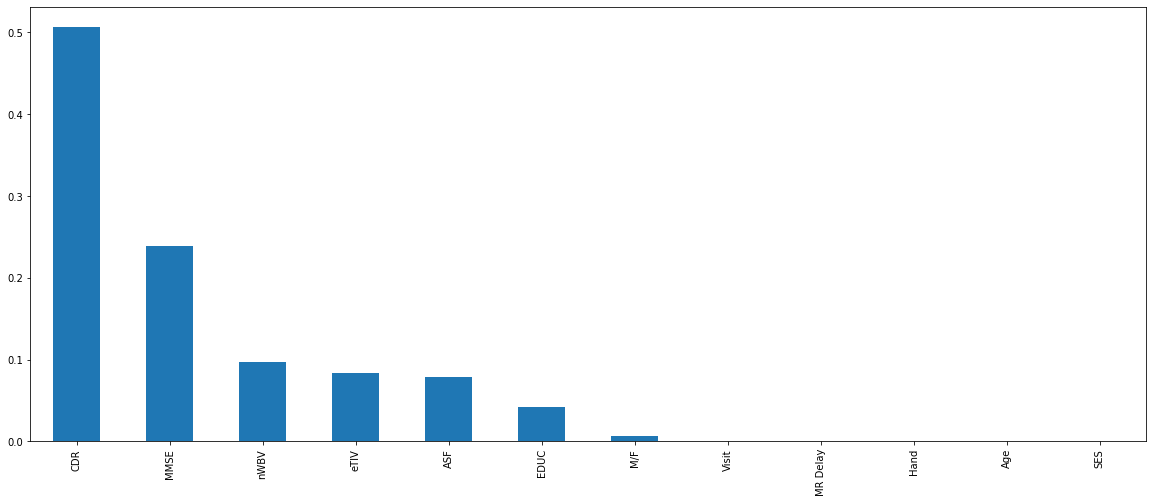

In [20]:
#ploting the ordered mutual_info values per feature
mutual_info1.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [21]:
from sklearn.feature_selection import SelectKBest

In [22]:
#No we Will select the  top 6 important features
sel_cols = SelectKBest(mutual_info_classif, k=6)
sel_cols.fit(X_train, y_train)
X_train.columns[sel_cols.get_support()]

Index(['M/F', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF'], dtype='object')